In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as sio
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [104]:
dataset1 = sio.loadmat('dataset1.mat')
dataset2 = sio.loadmat('dataset2.mat')

print(data_1.keys())
print(data_2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X_trn', 'X_tst', 'Y_trn', 'Y_tst'])
dict_keys(['__header__', '__version__', '__globals__', 'xtest', 'xtrain', 'ytest', 'ytrain'])


In [105]:
def SVM_model(X_train, y_train, X_test, y_test, kernel_choice):

    #creating model based on kernel choice
    if kernel_choice == "poly":
        model = svm.SVC(kernel = kernel_choice)
    elif kernel_choice == "rbf":
         model = svm.SVC(kernel = kernel_choice)
    else:
        model = svm.SVC(kernel = kernel_choice)
    
    #fit model to training data
    model.fit(X_train, y_train)
    
    #predicting on train and test data for accuracy
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    #calculating accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    return train_accuracy, test_accuracy, test_pred

# Dataset 1 

linear kernel = training accuracy: 96.82539682539682 test accuracy: 92.85714285714286
rbf kernel = training accuracy: 96.82539682539682 test accuracy: 92.85714285714286
poly kernel = training accuracy: 96.82539682539682 test accuracy: 100.0


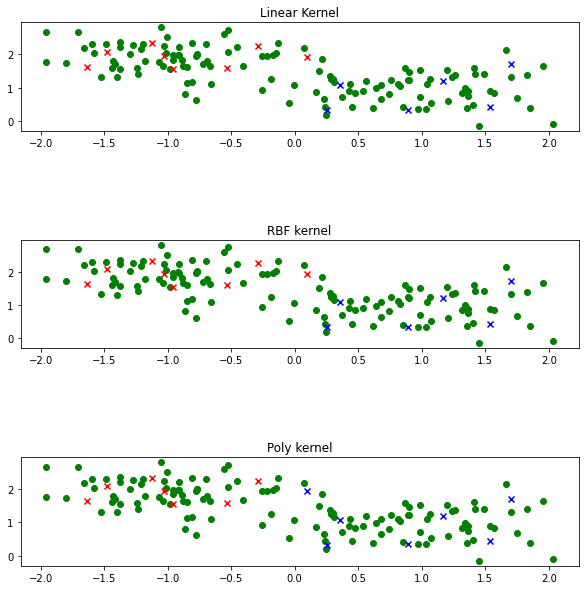

In [106]:
models = ["linear", "rbf", "poly"]

#splitting training and testing data for datset 1
X_train = dataset1['X_trn']
Y_train = dataset1['Y_trn'].ravel()
X_test = dataset1['X_tst']
Y_test = dataset1['Y_tst'].ravel()

test_predictions = []
#for each model, calculating accuracy
for model in models:
    accuracy_and_predictions = SVM_model(X_train, Y_train, X_test, Y_test, model)
    print(model, "kernel = training accuracy:", accuracy_and_predictions[0]*100, "test accuracy:", accuracy_and_predictions[1]*100)
    test_predictions.append(accuracy_and_predictions[2])
    

# print(test_predictions)

titles = ("Linear Kernel", "RBF kernel", "Poly kernel")
fig, sub = plt.subplots(3, figsize=(10, 10))
plt.subplots_adjust(hspace=1)

for test_pred, title, ax in zip(test_predictions, titles, sub.flatten()):
    ax.scatter(x = X_train[:,0], y = X_train[:,1], color = "green", marker="o")
    for i in range(len(test_pred)):
        if test_pred[i] == 0:
            ax.scatter(x = X_test[i,0], y = X_test[i,1], color = "red", marker='x')
        elif test_pred[i] == 1:
            ax.scatter(x = X_test[i,0], y = X_test[i,1], color = "blue", marker='x')
    ax.set_title(title)

plt.show()

# Dataset 2

linear kernel = training accuracy: 97.6 test accuracy: 97.7
rbf kernel = training accuracy: 100.0 test accuracy: 100.0
poly kernel = training accuracy: 92.60000000000001 test accuracy: 91.60000000000001


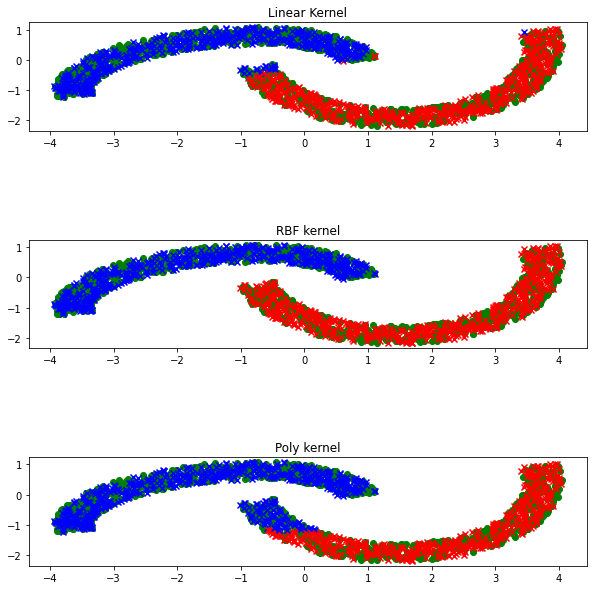

In [107]:
#splitting training and testing data for datset 2
X_train = dataset2['xtrain']
Y_train = dataset2['ytrain'].ravel()
X_test = dataset2['xtest']
Y_test = dataset2['ytest'].ravel()

test_predictions = []
#for each model, calculating accuracy
for model in models:
    accuracy_and_predictions = SVM_model(X_train, Y_train, X_test, Y_test, model)
    print(model, "kernel = training accuracy:", accuracy_and_predictions[0]*100, "test accuracy:", accuracy_and_predictions[1]*100)
    test_predictions.append(accuracy_and_predictions[2])

#plotting graphs
fig, sub = plt.subplots(3, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
for test_pred, title, ax in zip(test_predictions, titles, sub.flatten()):
    ax.scatter(x = X_trn[:,0], y = X_trn[:,1], color = "green")
    for i in range(len(test_pred)):
        if test_pred[i] == -1:
            ax.scatter(x = X_tst[i,0], y = X_tst[i,1], color = "red", marker = 'x')
        elif test_pred[i] == 1:
            ax.scatter(x = X_tst[i,0], y = X_tst[i,1], color = "blue", marker = 'x')
    ax.set_title(title)

plt.show()